In [ ]:
#Applying clustering on a data set

In [ ]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Reading the data - star clusters data
df=pd.read_csv('/content/star clusters.csv')
df

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
...,...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,63996
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,63997
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,63998
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,63999


In [ ]:
#Checking if there are any null values, there are none
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


In [ ]:

x=df['x']
y=df['y']
z=df.loc[:,('x','y')].values
z

array([[ 0.48593906, -0.52435857],
       [-0.06596069,  0.08084424],
       [-0.03480916,  0.07679548],
       ...,
       [-0.17556863, -0.39738956],
       [ 0.2399988 ,  0.62563109],
       [-0.15866721, -1.1509324 ]])

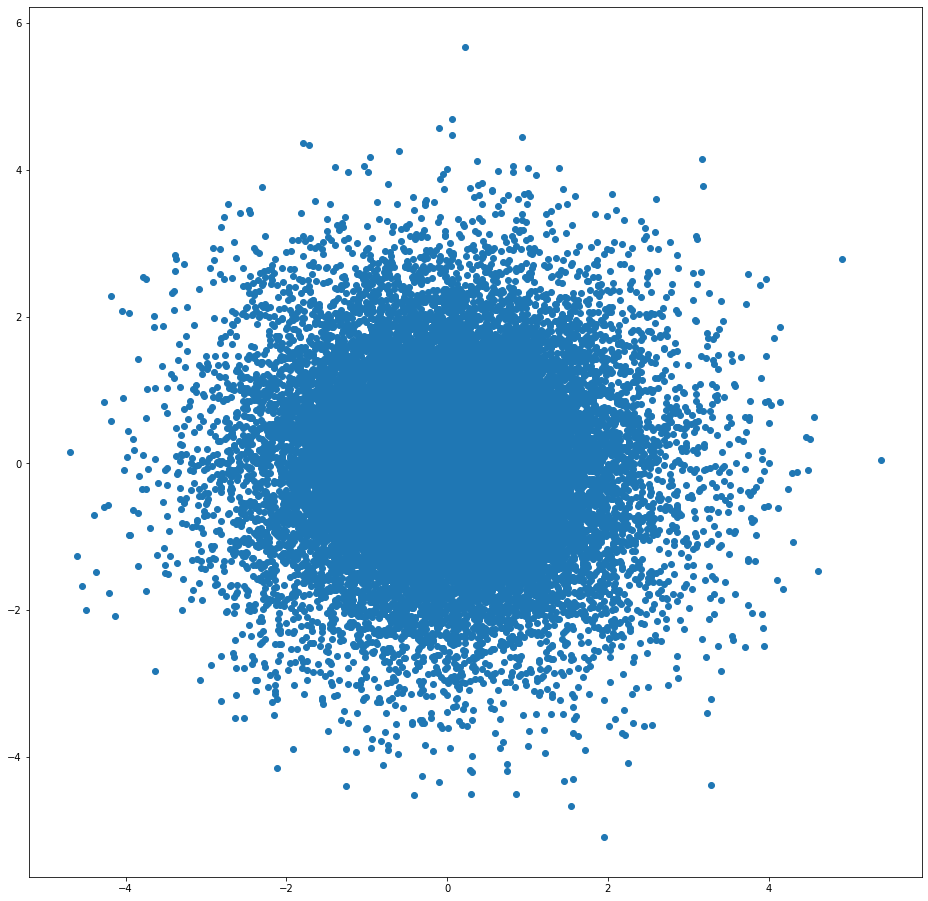

In [ ]:
#Plotting the x and y coordinates of stars in a scatter plot
plt.figure(figsize=(16,16))
plt.scatter(x,y)

In [ ]:
np.sqrt(64000)
#This gives us a value of 252.98. The number of clusters should never exceed this value

252.98221281347034

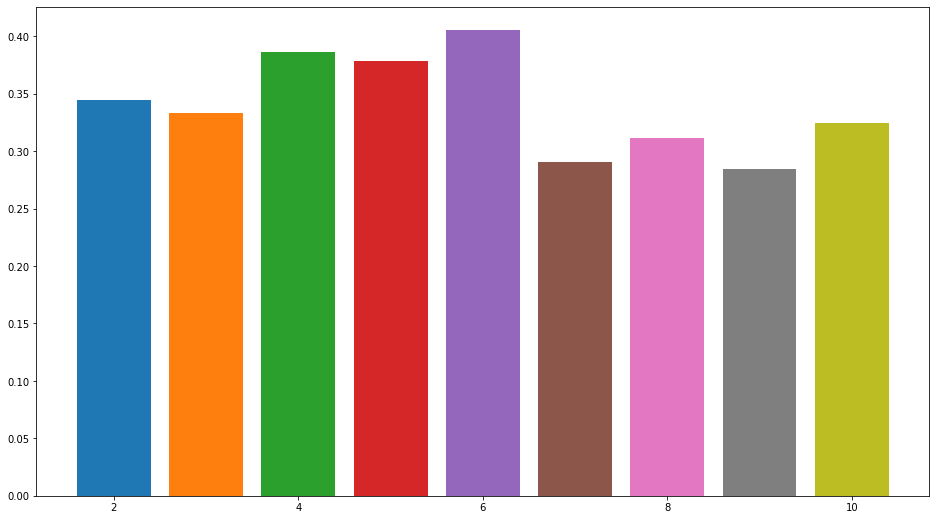

In [ ]:
#We take the range of 2 to 10 since the data is very large. It is also very likely the cluster value will be in the lower range given the scatter plot.
plt.figure(figsize=(16,9))
for i in range(2,11):
  test=MiniBatchKMeans(n_clusters=i,random_state=0)#creating a test model for i clusters
  test.fit(z)#fitting x and y values into test model
  pred=test.predict(z)
  plt.bar(i,silhouette_score(z,pred))#plotting the silhouette score for each cluster value
#We get the highest score for 6, meaning there are 6 clusters

Text(0, 0.5, 'Y-coodrinates')

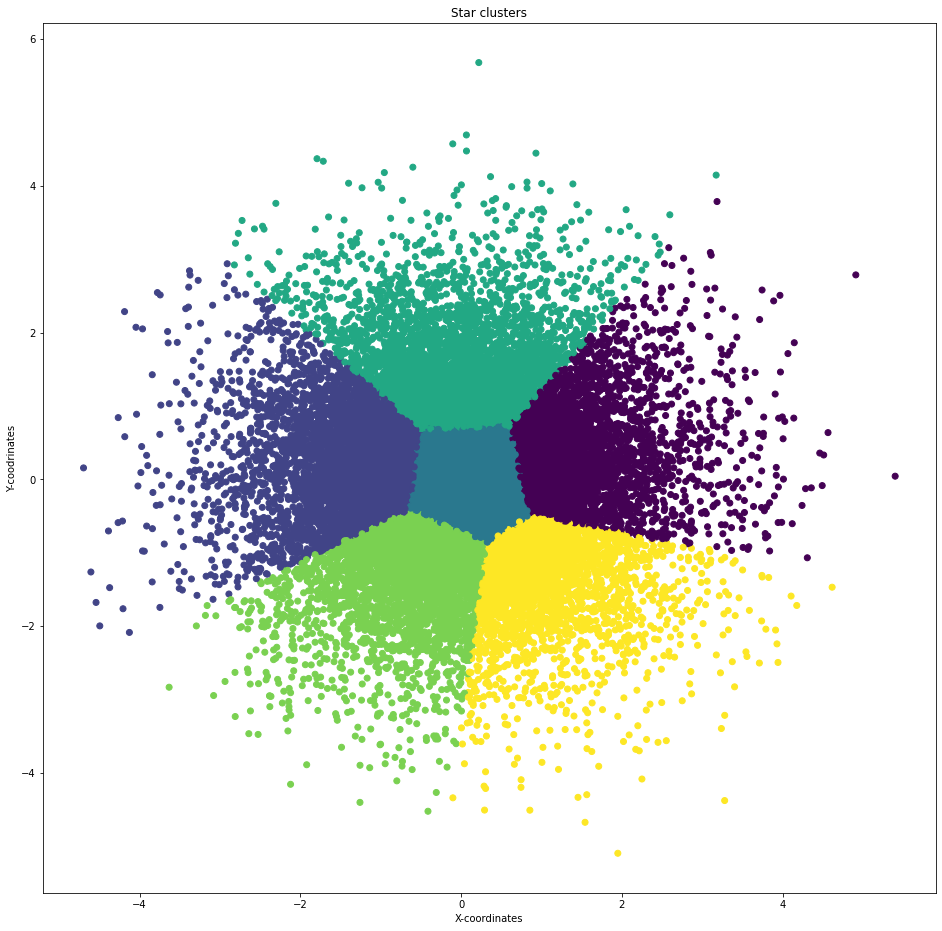

In [ ]:
k=6
model=MiniBatchKMeans(n_clusters=k,random_state=0)
model.fit(z)
plt.figure(figsize=(16,16))
plt.scatter(x,y,c=model.labels_)#Plotting the scatter once again and labelling the dots according to their clusters
plt.title("Star clusters")
plt.xlabel('X-coordinates')
plt.ylabel('Y-coodrinates')